In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# https://www.kaggle.com/code/toomuchsauce/mental-health-plotly-interactive-viz
def EDA(df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes and Missing values:' + '\033[0m')
    print(tabulate(pd.DataFrame(df.info()), headers = 'keys', tablefmt = 'fancy_grid'),
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df.columns:
        print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(df[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    df_temp = pd.DataFrame(df.describe(include='all'))
    print(tabulate(df_temp, headers = 'keys', floatfmt='g',numalign='right', stralign='center', missingval='-',tablefmt = 'fancy_grid'),
              '\n------------------------------------------------------------------------------------\n')
    
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(train_data)

EXPLORATORY DATA ANALYSIS :

Shape of the data (rows, columns):
(891, 12) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket

In [19]:
# https://www.kaggle.com/code/toomuchsauce/mental-health-plotly-interactive-viz
def EDA(df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df.columns:
        print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(df[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    df_temp = pd.DataFrame(df.describe(include='all'))
    print(tabulate(df_temp, headers = 'keys', floatfmt='g',numalign='right', stralign='center', missingval='-',tablefmt = 'fancy_grid'),
              '\n------------------------------------------------------------------------------------\n')
    
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(test_data)

EXPLORATORY DATA ANALYSIS :

Shape of the data (rows, columns):
(418, 11) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 n

In [26]:
from tabulate import tabulate
df_train = pd.DataFrame(train_data.describe(include='all'))
print("Train Data Frame \n")
print(tabulate(df_train, headers = 'keys', tablefmt = 'fancy_grid'))


df_test = pd.DataFrame(test_data.describe(include='all'))
print("Test Data Frame \n")
print(tabulate(df_test, headers = 'keys', tablefmt = 'fancy_grid'))

Train Data Frame 

╒════════╤═══════════════╤════════════╤════════════╤═════════════════════════╤═══════╤══════════╤════════════╤════════════╤══════════╤══════════╤═════════╤════════════╕
│        │   PassengerId │   Survived │     Pclass │ Name                    │ Sex   │      Age │      SibSp │      Parch │   Ticket │     Fare │ Cabin   │ Embarked   │
╞════════╪═══════════════╪════════════╪════════════╪═════════════════════════╪═══════╪══════════╪════════════╪════════════╪══════════╪══════════╪═════════╪════════════╡
│ count  │       891     │ 891        │ 891        │ 891                     │ 891   │ 714      │ 891        │ 891        │      891 │ 891      │ 204     │ 889        │
├────────┼───────────────┼────────────┼────────────┼─────────────────────────┼───────┼──────────┼────────────┼────────────┼──────────┼──────────┼─────────┼────────────┤
│ unique │       nan     │ nan        │ nan        │ 891                     │ 2     │ nan      │ nan        │ nan        │      681 │ n

<Figure size 432x288 with 0 Axes>

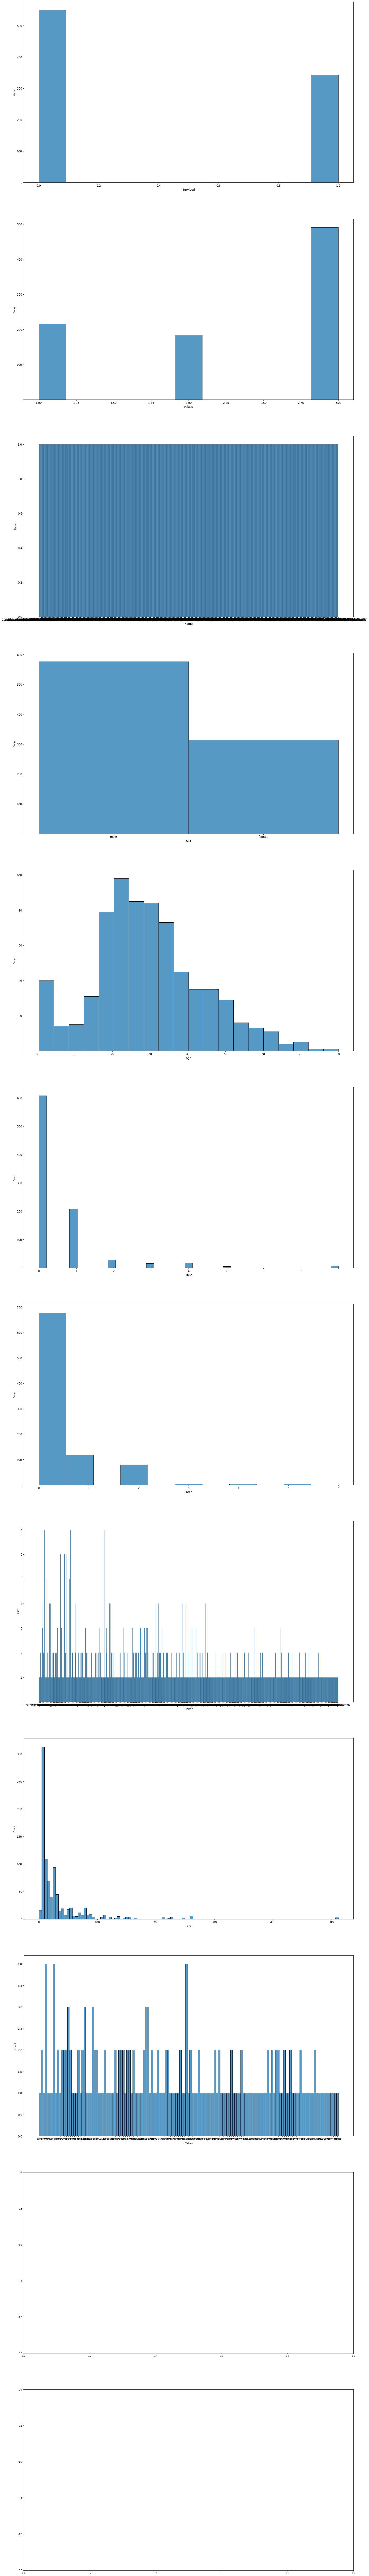

In [26]:
categorical_columns = train_data.columns[1:-1]
i = 0
num = len(train_data.columns)
plt.figure()
fig, ax = plt.subplots(int(num),1,figsize=(25,200))
for col in categorical_columns:
    i += 1
    plt.subplot(int(num),1,i)
    sns.histplot(x=train_data[col])
    plt.xlabel(col, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();